<a href="https://colab.research.google.com/github/michaelajao/Plant-Disease-detection-using-Deep-Learning/blob/master/plant_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir

from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

from sklearn.model_selection import train_test_split

import tensorflow_hub as hub
print("Tf version: ", tf.__version__)

#check for gpu accessibility 
print("GPU", "Yessss Available" if tf.config.list_physical_devices("GPU")else "not Available :(")

Tf version:  2.3.0
GPU Yessss Available


In [4]:
!nvidia-smi

Tue Nov 24 16:41:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |     10MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### The split folders pip install is to be used to split the data since it is only a folder holding all the image data and class name, with this train, test and validation dataset

In [6]:
cd /content/drive/MyDrive/Plant

/content/drive/MyDrive


In [ ]:
!pip install split-folders

In [ ]:
pip install split-folders tqdm

In [ ]:
import splitfolders  # or import split_folders

# Path to the dataset folder
root_dir = "/content/drive/MyDrive/Plant/digipathos-plant-disease-img-db-downloader/plant-disease-db"

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(root_dir, output="output", seed=1337, ratio=(.7, .3), group_prefix=None) # default values


In [5]:
# Dimension of resized image
#DEFAULT_IMAGE_SIZE = tuple((256, 256))
image_size = 224

# Path to the split dataset folder
data_dir = "/content/drive/MyDrive/Plant/output"

train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'val')

In [6]:
disease_types = ['Abacaxi (Pineapple) - Broca (Pineapple Fruit Borer) - 1', 'Abacaxi (Pineapple) - Fusariose (Fusariose) - 1', 'Abacaxi (Pineapple) - Podridão (Black Rot) - 1', 'Algodão (Cotton) - Fusariose (Fusarium Wilt) - 1', 'Algodão (Cotton) - Mancha de Mirotecio (Myrothecium leaf spot) - 1', 'Algodão (Cotton) - Mancha de Mirotecio (Myrothecium leaf spot) - Cropped', 'Algodão (Cotton) - Mela (Soreshin) - 1', 'Algodão (Cotton) - Mela (Soreshin) - Cropped', 'Algodão (Cotton) - Ramularia (Areolate Mildew) - 1', 'Algodão (Cotton) - Ramularia (Areolate Mildew) - Cropped', 'Arroz (Rice) - Brusone (Rice Blast) - 1', 'Arroz (Rice) - Brusone (Rice Blast) - Cropped', 'Arroz (Rice) - Escaldadura (Leaf Scald) - 1', 'Arroz (Rice) - Escaldadura (Leaf Scald) - Cropped', 'Café (Coffee) - BichoMineiro (Leaf Miner) - 1', 'Café (Coffee) - BichoMineiro (Leaf Miner) - Cropped', 'Café (Coffee) - Cercospora-Ferrugem (Cercospora Leaf Spot and Rust) - 1', 'Café (Coffee) - Cercosporiose (Cercospora Leaf Spot) - 1', 'Café (Coffee) - Cercosporiose (Cercospora Leaf Spot) - Cropped', 'Café (Coffee) - Ferrugem (Rust) - 1', 'Café (Coffee) - Ferrugem (Rust) - Cropped', 'Café (Coffee) - Mancha Aureolada (Bacterial Blight) - 1', 'Café (Coffee) - Mancha Aureolada (Bacterial Blight) - Cropped', 'Café (Coffee) - Mancha Mantegosa (Blister Spot) - 1', 'Café (Coffee) - Mancha Mantegosa (Blister Spot) - Cropped', 'Café (Coffee) - Phoma (Brown leaf spot) - 1', 'Café (Coffee) - Phoma (Brown leaf spot) - Cropped', 'Café (Coffee) - QueimaFio (Pellicularia koleroga) - 1', 'Café (Coffee) - Rizoctoniose (Damping Off) - 1', 'Café (Coffee) - Saudavel (Healthy) - 1', 'Cajueiro (Cashew Tree) - Alga (Algae) - 1', 'Cajueiro (Cashew Tree) - Alga (Algae) - Cropped', 'Cajueiro (Cashew Tree) - Antracnose (Anthracnose) - 1', 'Cajueiro (Cashew Tree) - Antracnose (Anthracnose) - 2', 'Cajueiro (Cashew Tree) - Antracnose (Anthracnose) - Cropped', 'Cajueiro (Cashew Tree) - Larva (Worm) - 1', 'Cajueiro (Cashew Tree) - Mancha Angular (Angular Leaf Spot) - 1', 'Cajueiro (Cashew Tree) - Mancha Angular (Angular Leaf Spot) - Cropped', 'Cajueiro (Cashew Tree) - Mofo Preto (Black Mould) - 1', 'Cajueiro (Cashew Tree) - Mofo Preto (Black Mould) - Cropped', 'Cajueiro (Cashew Tree) - Oidio (Powdery Mildew) - 1', 'Cajueiro (Cashew Tree) - Oidio (Powdery Mildew) - Cropped', 'Cajueiro (Cashew Tree) - Resinose (Gummosis) - 1', 'Cajueiro (Cashew Tree) - Resinose (Gummosis) - Cropped', 'Cajueiro (Cashew Tree) - Sclerotium (Seedling Blight) - 1', 'Cajueiro (Cashew Tree) - Seca dos Ponteiros - 1', 'Cana (Sugarcane) - Ferrugem (Rust) - 1', 'Cana (Sugarcane) - Ferrugem (Rust) - Cropped', 'Cana (Sugarcane) - Mancha Anelar (Ring Spot) - 1', 'Cana (Sugarcane) - Mancha Anelar (Ring Spot) - Cropped', 'Cana (Sugarcane) - Mancha Anelar e Mosca Branca (Ring Spot and White Fly) - 1', 'Cana (Sugarcane) - Podridao Vermelha (Red Stripe) - 1', 'Cana (Sugarcane) - Podridao Vermelha (Red Stripe) - Cropped', 'Cana (Sugarcane) - Saudavel (Healthy) - 1', 'Citros (Citrus) - Alga (Algae) - 1', 'Citros (Citrus) - Alga (Algae) - Cropped', 'Citros (Citrus) - Alternaria (Alternaria brown spot) - 1', 'Citros (Citrus) - Alternaria (Alternaria brown spot) - Cropped', 'Citros (Citrus) - Cancro (Citrus canker) - 1', 'Citros (Citrus) - Cancro (Citrus canker) - Cropped', 'Citros (Citrus) - Clorose (Citrus variegated chlorosis) - 1', 'Citros (Citrus) - Clorose (Citrus variegated chlorosis) - Cropped', 'Citros (Citrus) - Deficiencia Nutricional (Nutritional Deficiency) - 1', 'Citros (Citrus) - Feltro (Felt) - 1', 'Citros (Citrus) - Fumagina (Sooty Mold) - 1', 'Citros (Citrus) - Fumagina (Sooty Mold) - Cropped', 'Citros (Citrus) - Leprose (Leprosis) - 1', 'Citros (Citrus) - Leprose (Leprosis) - Cropped', 'Citros (Citrus) - Mancha Aureolada (Halo Blight) - 1', 'Citros (Citrus) - Mancha Aureolada (Halo Blight) - Cropped', 'Citros (Citrus) - Mancha Graxa (Citrus Greasy Spot) - 1', 'Citros (Citrus) - Mancha Graxa (Citrus Greasy Spot) - Cropped', 'Citros (Citrus) - Mancha Preta (Black Spot) - 1', 'Citros (Citrus) - Mosaico (Mosaic) - 1', 'Citros (Citrus) - Mosaico (Mosaic) - Cropped', 'Citros (Citrus) - Penicillium (Penicillium) - 1', 'Citros (Citrus) - Podridao Floral (Postbloom fruit drop of citrus) - 1', 'Citros (Citrus) - Queima Fio (White-Thread Blight) - 1', 'Citros (Citrus) - Sadia (Healthy) - 1', 'Citros (Citrus) - Verrugose (Scab) - 1', 'Citros (Citrus) - Verrugose (Scab) - Cropped', 'Coqueiro (Coconut Tree) - Acaro Mancha Longitudinal (Steneotarsonemus furcatus) - 1', 'Coqueiro (Coconut Tree) - Acaro Necrose (Aceria guerreronis) - 1', 'Coqueiro (Coconut Tree) - Ataque Lagarta (Caterpillar damage) - 1', 'Coqueiro (Coconut Tree) - Cochonilha (Coconut scale) - 1', 'Coqueiro (Coconut Tree) - Cochonilha (Coconut scale) - Cropped', 'Coqueiro (Coconut Tree) - Fitotoxidez (Phytotoxicity) - 1', 'Coqueiro (Coconut Tree) - Fitotoxidez (Phytotoxicity) - Cropped', 'Coqueiro (Coconut Tree) - Fumagina (Sooty mold) - 1', 'Coqueiro (Coconut Tree) - Helmintosporiose (Dreschslera incurvata) - 1', 'Coqueiro (Coconut Tree) - Helmintosporiose (Dreschslera incurvata) - Cropped', 'Coqueiro (Coconut Tree) - Lixa Grande (Lixa Grande) - 1', 'Coqueiro (Coconut Tree) - Lixa Grande (Lixa Grande) - Cropped', 'Coqueiro (Coconut Tree) - Lixa Pequena (Lixa pequena) - 1', 'Coqueiro (Coconut Tree) - Lixa grande e pequena (Lixa grande and lixa pequena) - 1']

In [7]:
data = []
for diseases, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        data.append(['{}/{}'.format(sp, file), diseases, sp])
        
train = pd.DataFrame(data, columns=['File', 'DiseaseID','Disease Type'])
train.head(5)

,File,DiseaseID,Disease Type
0,Abacaxi (Pineapple) - Broca (Pineapple Fruit B...,0,Abacaxi (Pineapple) - Broca (Pineapple Fruit B...
1,Abacaxi (Pineapple) - Broca (Pineapple Fruit B...,0,Abacaxi (Pineapple) - Broca (Pineapple Fruit B...
2,Abacaxi (Pineapple) - Fusariose (Fusariose) - ...,1,Abacaxi (Pineapple) - Fusariose (Fusariose) - 1
3,Abacaxi (Pineapple) - Fusariose (Fusariose) - ...,1,Abacaxi (Pineapple) - Fusariose (Fusariose) - 1
4,Abacaxi (Pineapple) - Fusariose (Fusariose) - ...,1,Abacaxi (Pineapple) - Fusariose (Fusariose) - 1


In [8]:
seed = 45
train = train.sample(frac=1, random_state = seed)
train_index = np.arange(len(train)) #to reset the indices
train.head()

,File,DiseaseID,Disease Type
7264,Cana (Sugarcane) - Mancha Anelar (Ring Spot) -...,49,Cana (Sugarcane) - Mancha Anelar (Ring Spot) -...
62,Algodão (Cotton) - Mancha de Mirotecio (Myrot...,5,Algodão (Cotton) - Mancha de Mirotecio (Myrot...
10259,Coqueiro (Coconut Tree) - Lixa Grande (Lixa Gr...,92,Coqueiro (Coconut Tree) - Lixa Grande (Lixa Gr...
8821,Citros (Citrus) - Clorose (Citrus variegated c...,61,Citros (Citrus) - Clorose (Citrus variegated c...
8946,Citros (Citrus) - Fumagina (Sooty Mold) - Crop...,65,Citros (Citrus) - Fumagina (Sooty Mold) - Cropped


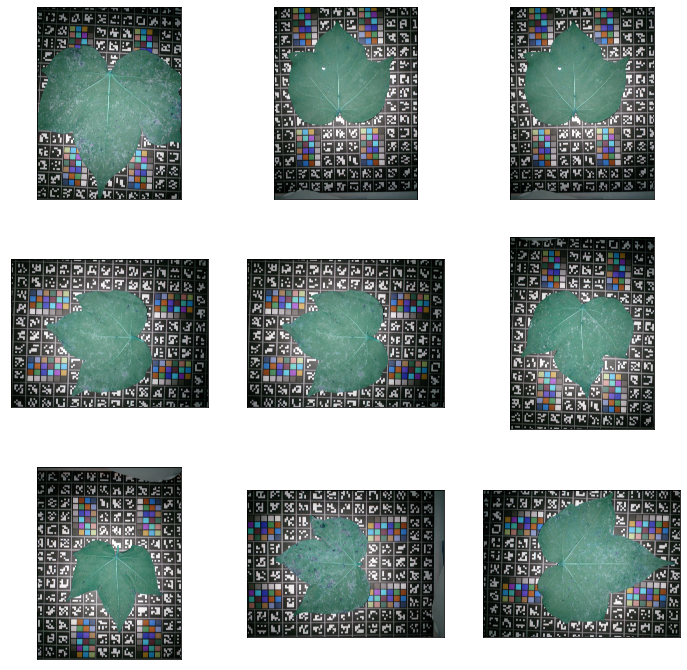

In [9]:
def disease_type(disease_type, rows, cols):
    fig,ax = plt.subplots(rows, cols, figsize=(12,12))
    disease_type = train['File'][train['Disease Type'] == disease_type].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(train_dir, disease_type[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
disease_type('Algodão (Cotton) - Ramularia (Areolate Mildew) - 1', 3, 3)

In [10]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                            shear_range = 0.2,
                                                            zoom_range = 0.2,
                                                            width_shift_range = 0.2,
                                                            height_shift_range = 0.2,
                                                            fill_mode="nearest")
batch_size = 32
train_data = train_datagen.flow_from_directory(os.path.join(train_dir),
                                               target_size=(image_size, image_size),
                                               batch_size=batch_size,
                                               class_mode="categorical"                                               
                                              )

Found 10681 images belonging to 95 classes.


In [11]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                            shear_range = 0.2,
                                                            zoom_range = 0.2,
                                                            width_shift_range = 0.2,
                                                            height_shift_range = 0.2,
                                                            fill_mode="nearest")
test_data = test_datagen.flow_from_directory(os.path.join(test_dir),
                                               target_size=(image_size, image_size),
                                               batch_size=batch_size,
                                               class_mode="categorical"                                               
                                              )

Found 4628 images belonging to 95 classes.


In [12]:
categories = list(train_data.class_indices.keys())
print(categories)
len(categories)

['Abacaxi (Pineapple) - Broca (Pineapple Fruit Borer) - 1', 'Abacaxi (Pineapple) - Fusariose (Fusariose) - 1', 'Abacaxi (Pineapple) - Podridão (Black Rot) - 1', 'Algodão (Cotton) - Fusariose (Fusarium Wilt) - 1', 'Algodão (Cotton) - Mancha de Mirotecio (Myrothecium leaf spot) - 1', 'Algodão (Cotton) - Mancha de Mirotecio (Myrothecium leaf spot) - Cropped', 'Algodão (Cotton) - Mela (Soreshin) - 1', 'Algodão (Cotton) - Mela (Soreshin) - Cropped', 'Algodão (Cotton) - Ramularia (Areolate Mildew) - 1', 'Algodão (Cotton) - Ramularia (Areolate Mildew) - Cropped', 'Arroz (Rice) - Brusone (Rice Blast) - 1', 'Arroz (Rice) - Brusone (Rice Blast) - Cropped', 'Arroz (Rice) - Escaldadura (Leaf Scald) - 1', 'Arroz (Rice) - Escaldadura (Leaf Scald) - Cropped', 'Café (Coffee) - BichoMineiro (Leaf Miner) - 1', 'Café (Coffee) - BichoMineiro (Leaf Miner) - Cropped', 'Café (Coffee) - Cercospora-Ferrugem (Cercospora Leaf Spot and Rust) - 1', 'Café (Coffee) - Cercosporiose (Cercospora Leaf Spot) 

95

In [13]:
train_data.image_shape

(224, 224, 3)

In [14]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [15]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [16]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=5) # stops after 3 rounds of no improvements

In [17]:
# Setup input shape to the model
INPUT_SHAPE = [None, image_size, image_size, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(categories) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [18]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax"
                          ) # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model


In [19]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
_________________________________________________________________
dense (Dense)                (None, 95)                95190     
Total params: 3,635,455
Trainable params: 95,190
Non-trainable params: 3,540,265
_________________________________________________________________


In [20]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 30 #@param {type:"slider", min:10, max:100, step:10}

In [21]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=test_data,
            steps_per_epoch = 100,
            validation_steps = 50,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [1]:
# Fit the model to the data
model = train_model()

NameError: ignored

In [22]:
module_selection = ("mobilenet_v2_100_224", 224)
handle_base, pixels = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/imagenet/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {}".format(MODULE_HANDLE, IMAGE_SIZE))

BATCH_SIZE = 32

Using https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4 with input size (224, 224)


In [23]:
do_fine_tuning = False

In [24]:
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(MODULE_HANDLE, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_data.num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 95)                121695    
Total params: 2,379,679
Trainable params: 121,695
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [ ]:
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = test_data.samples // test_data.batch_size
hist = model.fit(
    train_data,
    epochs=NUM_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    callbacks = [early_stopping],
    validation_data=test_data,
    validation_steps=validation_steps).history

Epoch 1/30
333/333 [==============================] - 12480s 37s/step - loss: 2.2144 - accuracy: 0.5740 - val_loss: 1.7256 - val_accuracy: 0.7088
Epoch 2/30
333/333 [==============================] - 330s 992ms/step - loss: 1.7394 - accuracy: 0.7019 - val_loss: 1.5924 - val_accuracy: 0.7515
Epoch 3/30
333/333 [==============================] - 323s 969ms/step - loss: 1.6301 - accuracy: 0.7413 - val_loss: 1.5438 - val_accuracy: 0.7700
Epoch 4/30
333/333 [==============================] - 323s 971ms/step - loss: 1.5671 - accuracy: 0.7639 - val_loss: 1.5323 - val_accuracy: 0.7641
Epoch 5/30
333/333 [==============================] - 323s 971ms/step - loss: 1.5231 - accuracy: 0.7798 - val_loss: 1.4770 - val_accuracy: 0.7906
Epoch 6/30
333/333 [==============================] - 329s 987ms/step - loss: 1.4970 - accuracy: 0.7889 - val_loss: 1.4746 - val_accuracy: 0.7888
Epoch 7/30
333/333 [==============================] - 328s 986ms/step - loss: 1.4859 - accuracy: 0.7888 - val_loss: 1.4658 -

In [2]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

NameError: ignored

In [ ]:
preds = model.predict(test_data, steps=5)
label = test_data.classes
pred = model.predict(test_data)

predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
labels = (test_data.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cf_report = classification_report(predicted_class_indices,label)
cm = confusion_matrix(predicted_class_indices,label)

print(cf_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00        11
           9       0.11      0.12      0.11       490
          10       0.00      0.00      0.00         0
          11       0.03      0.03      0.03        73
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00        14
          18       0.00      0.00      0.00        31
          19       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 185.89999999999995, 'Predicted')

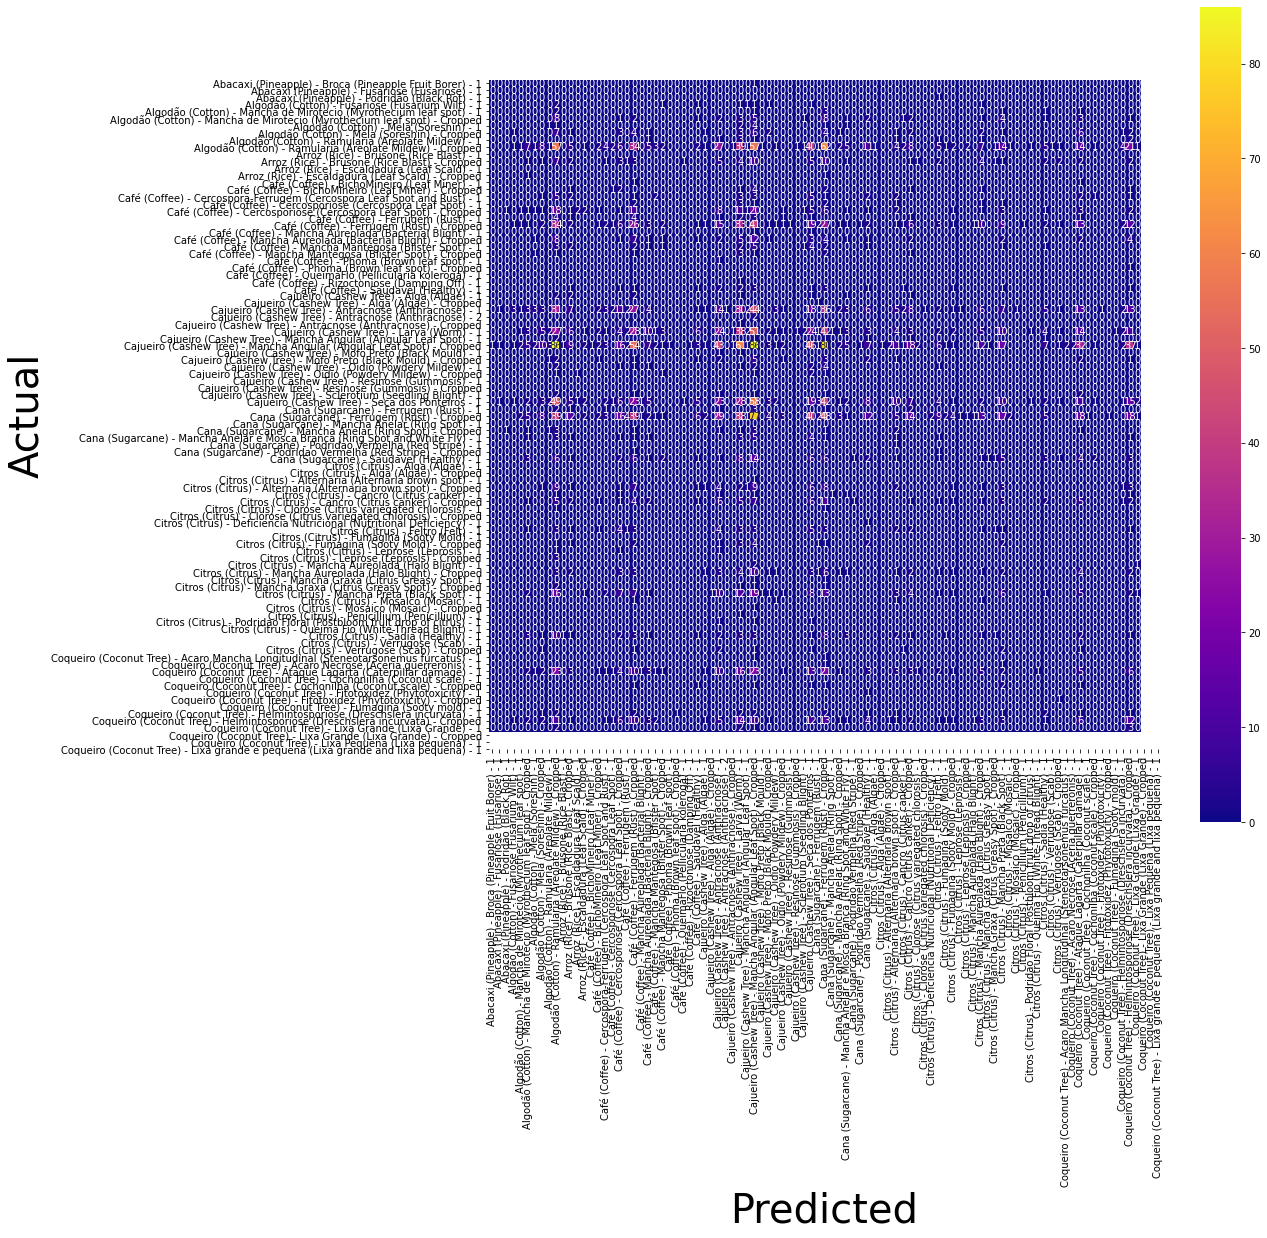

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(cm, cmap=plt.cm.plasma, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)

ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(OUTPUT_SHAPE, activation= 'softmax')
])

In [ ]:
MyCnn.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## lets train our CNN
retVal = MyCnn.fit(train_data,validation_data= test_data,epochs = 30, steps_per_epoch = 100,
            validation_steps = 50, callbacks= [early_stopping])

Epoch 1/30
100/100 [==============================] - 112s 1s/step - loss: 0.7583 - accuracy: 0.7529 - val_loss: 0.7672 - val_accuracy: 0.7469
Epoch 2/30
100/100 [==============================] - 114s 1s/step - loss: 0.6911 - accuracy: 0.7759 - val_loss: 0.8085 - val_accuracy: 0.7613
Epoch 3/30
100/100 [==============================] - 114s 1s/step - loss: 0.6918 - accuracy: 0.7723 - val_loss: 0.7749 - val_accuracy: 0.7625
Epoch 4/30
100/100 [==============================] - 111s 1s/step - loss: 0.7022 - accuracy: 0.7766 - val_loss: 0.7580 - val_accuracy: 0.7694
Epoch 5/30
100/100 [==============================] - 109s 1s/step - loss: 0.7100 - accuracy: 0.7709 - val_loss: 0.7566 - val_accuracy: 0.7656
Epoch 6/30
100/100 [==============================] - 114s 1s/step - loss: 0.7007 - accuracy: 0.7700 - val_loss: 0.7468 - val_accuracy: 0.7725
Epoch 7/30
100/100 [==============================] - 110s 1s/step - loss: 0.7128 - accuracy: 0.7716 - val_loss: 0.7029 - val_accuracy: 0.7869

In [ ]:
image_path = '/content/drive/MyDrive/Plant/output/val/Algodão (Cotton) - Ramularia (Areolate Mildew) - Cropped/ramu026.jpg'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
preds1 = model.predict_classes(input_arr)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


ValueError: ignored

In [ ]:
preds1

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

# Show model size in KBs.
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmpcioq4vy8/assets


INFO:tensorflow:Assets written to: /tmp/tmpcioq4vy8/assets


Float model size = 14099KBs.


In [ ]:
# Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Show model size in KBs.
quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))

INFO:tensorflow:Assets written to: /tmp/tmpnlayef3e/assets


INFO:tensorflow:Assets written to: /tmp/tmpnlayef3e/assets


Quantized model size = 3672KBs,
which is about 26% of the float model size.


In [ ]:
f = open('plant_model.tflite', "wb")
f.write(tflite_quantized_model)
f.close()